In [1]:
import nltk
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from collections import Counter
import os
import glob

%matplotlib inline

In [2]:
fil = open("../data/convote_v1.1/data_stage_one/development_set/052_400011_0327014_DON.txt", 'r')
statinfo = os.stat("../data/convote_v1.1/data_stage_one/development_set/052_400011_0327014_DON.txt")
print(int(statinfo.st_size))

5776


In [3]:
#putting all of the convote stage one data into a pandas dataframe
path = "../data/convote_v1.1/data_stage_one/development_set/"
df = pd.DataFrame([[1, 2, 'stuff']], columns=['Party', 'Size', 'Speech'])
i = 0
for filename in glob.glob(os.path.join(path, '*.txt')):
    tempFil = open(filename, 'r')
    indicator = (filename[-7:-4])
    statinfo = os.stat(filename)
    s = int(statinfo.st_size)
    party = 0
    #democrat = 0, republican = 1
    if indicator[0] == 'D':
        party = 0
    else:
        party = 1
    df.loc[i] = ([party, s, tempFil.read()])
    i += 1  

Total Democrats in Dataframe:  335
Total Republicans in Dataframe:  367
Average Word count of speeches in Dataframe:  1678.2549857549857
Average Word count of Democratic speeches in Dataframe: 1970.2149253731343 6121.178940325037
Average Word count of Republican speeches in Dataframe: 1411.7520435967303 2508.2172834988637


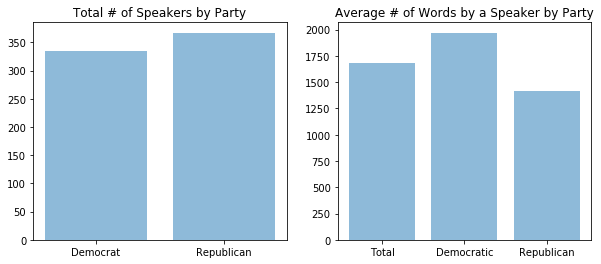

In [4]:
#note use iloc for indexing stuff, read more about it in pandas doc, exampleSpeech = df.iloc[0]['Speech']
#first get some stats about the speeches

def getTotalAverages(df):
    """
    This function goes through the pandas dataframe to calculate the averages of the total dataframe.
    These averages include, length of speeches, total democrats, total republicans
    df: a pandas dataframe
    """
    totalDem, totalRepub, averageWordCount, averageDemWord, averageRepubWord = 0, 0, [], [], []
    
    for index, row in df.iterrows():
        if row["Party"] == 0: 
            totalDem += 1
            averageWordCount.append(len(row["Speech"]))
            averageDemWord.append(len(row["Speech"]))
        else: 
            totalRepub += 1
            averageWordCount.append(len(row["Speech"]))
            averageRepubWord.append(len(row["Speech"]))
            
    print("Total Democrats in Dataframe: ", totalDem)
    print("Total Republicans in Dataframe: ", totalRepub)
    print("Average Word count of speeches in Dataframe: ", (np.average(averageWordCount)))
    print("Average Word count of Democratic speeches in Dataframe:", np.average(averageDemWord), np.std(averageDemWord))
    print("Average Word count of Republican speeches in Dataframe:", np.average(averageRepubWord), np.std(averageRepubWord))
    
    #plotting these 
    fig, axs = plt.subplots(ncols=2, figsize=(10, 4))
    axs[0].bar(['Democrat', 'Republican'], [totalDem, totalRepub], align='center', alpha=0.5)
    axs[0].set_title('Total # of Speakers by Party')
    axs[1].bar(['Total', 'Democratic', 'Republican'], 
                   [np.average(averageWordCount), np.average(averageDemWord), np.average(averageRepubWord)],
                   align='center', alpha=0.5)
    axs[1].set_title('Average # of Words by a Speaker by Party')
        
getTotalAverages(df)

In [5]:
#Generate word cloud section
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

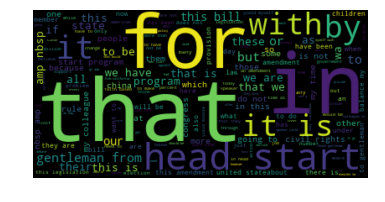

In [6]:
#basic, I might want to do some cleaning of the corpus before I generate the word cloud
text = " ".join(review for review in df.Speech)
wordcloud = WordCloud(stopwords=['mr', 'chairman', 'and', 'of', 'on', 'the']).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

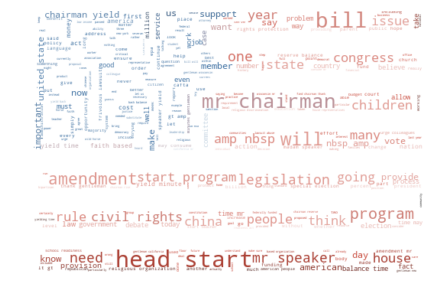

In [7]:
#flag, we can easily make word clouds of the different parties speeches
mask = np.array(Image.open("../data/img/us.png"))
wordcloud_usa = WordCloud(background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(text)
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[7,7])
plt.imshow(wordcloud_usa.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.show()

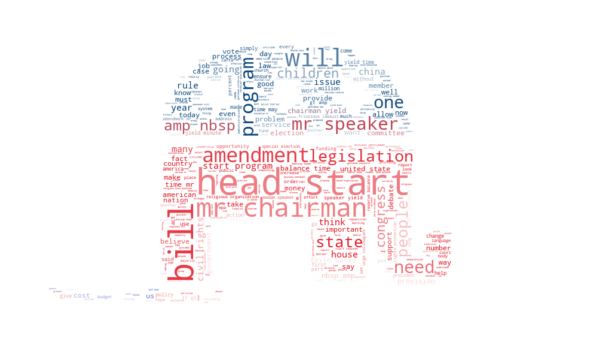

In [8]:
elephant = np.array(Image.open("../data/img/e.jpg"))
demText = " ".join(review for review in df.Speech if df['Party'].bool)
wordcloud_dem = WordCloud(background_color="white", mode="RGBA", max_words=1000, mask=elephant).generate(text)
image_colors = ImageColorGenerator(elephant)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud_dem.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.show()

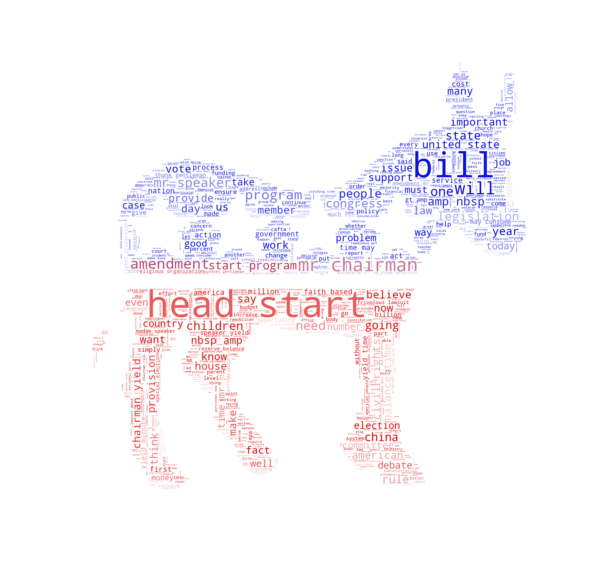

In [9]:
donkey = np.array(Image.open("../data/img/d.jpg"))
demText = " ".join(review for review in df.Speech if not df['Party'].bool)
wordcloud_rep = WordCloud(background_color="white", mode="RGBA", max_words=1000, mask=donkey).generate(text)
image_colors = ImageColorGenerator(donkey)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud_rep.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.show()

In [10]:
#stemming and tokenization
"""
For future reference, since we might need to do a sentence level tokenization, then pass those through a word tokenizer,
and then do stemming and lemmatization on a list of lists. Reread the recurrent neural network paper and see how they did the 
sentence level classificiation of bias
"""
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer
porter=PorterStemmer()

exampleSpeech = df.iloc[0]['Speech']

def stemSentence(sentence):
    token_words=word_tokenize(sentence)
    token_words
    stem_sentence=[]
    for word in token_words:
        stem_sentence.append(porter.stem(word))
        stem_sentence.append(" ")
    return "".join(stem_sentence)

exampleStem=stemSentence(exampleSpeech)

In [11]:
#Lemmatization
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()


input_str=word_tokenize(exampleSpeech)

for word in input_str:
    print(wordnet_lemmatizer.lemmatize(word))


mr.
chairman
,
i
thank
the
gentlewoman
for
yielding
me
this
time
.
my
good
colleague
from
california
raised
the
exact
and
critical
point
.
the
question
is
,
what
happens
during
those
45
day
?
we
will
need
to
support
election
.
there
is
not
a
single
member
of
this
house
who
ha
not
supported
some
form
of
general
election
,
a
special
election
,
to
replace
the
member
at
some
point
.
but
during
that
45
day
,
what
happens
?
the
chair
of
the
constitution
subcommittee
say
this
is
what
happens
:
martial
law
.
we
do
not
know
who
would
fill
the
vacancy
of
the
presidency
,
but
we
do
know
that
the
succession
act
most
likely
suggests
it
would
be
an
unelected
person
.
the
sponsor
of
the
bill
before
u
today
insist
,
and
i
think
rightfully
so
,
on
the
importance
of
election
.
but
to
then
say
that
during
a
45-day
period
we
would
have
none
of
the
check
and
balance
so
fundamental
to
our
constitution
,
none
of
the
separation
of
power
,
and
that
the
presidency
would
be
filled
by
an
unelected
member
of
the
c

In [12]:
#Everything else, remove stop words, remove puncuation, all lowercase, remove sparse terms

## Data Exploration

### TODO: 
1. ~~Stemmed (Porter Stemmer)~~
2. ~~Lowercase everyword~~
3. ~~Remove Stopwords~~
4. TF - IDF (unigram, bigram, Trigram)
5. TF - IDF (for phrases?)
6. Pennn Part-of-speech tag
7. ~~Flesch-Kincaid Grade Level~~
8. ~~Flesch Reading Ease scores~~

In [13]:
df.head()
reading_ease = df.copy() 

In [14]:
#all lower case
df['Speech'] = df['Speech'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['Speech'].head()

0    mr. chairman , i thank the gentlewoman for yie...
1    mr. chairman , i want to thank my good friend ...
2    mr. chairman , i rise to make two fundamental ...
3    mr. chairman , reclaiming my time , let me mak...
4    mr. chairman , i thank my distinguished collea...
Name: Speech, dtype: object

In [15]:
#removing punctuation
df['Speech'] = df['Speech'].str.replace('[^\w\s]','')
df['Speech'].head()

0    mr chairman  i thank the gentlewoman for yield...
1    mr chairman  i want to thank my good friend fr...
2    mr chairman  i rise to make two fundamental po...
3    mr chairman  reclaiming my time  let me make t...
4    mr chairman  i thank my distinguished colleagu...
Name: Speech, dtype: object

In [16]:
#removing stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['Speech'] = df['Speech'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df.head()

[nltk_data] Downloading package stopwords to C:\Users\Taber
[nltk_data]     Fisher\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Party,Size,Speech
0,0,5776,mr chairman thank gentlewoman yielding time go...
1,0,3301,mr chairman want thank good friend california ...
2,0,1704,mr chairman rise make two fundamental points p...
3,0,1568,mr chairman reclaiming time let make two final...
4,0,1186,mr chairman thank distinguished colleague appr...


In [17]:
#finding most commonwords and removing them
commonWords = pd.Series(' '.join(df['Speech']).split()).value_counts()[:10]
uncommonWords = pd.Series(' '.join(df['Speech']).split()).value_counts()[-10:]
print('Common Words: ')
print(commonWords)
print('Uncommon Words')
print(uncommonWords)
commonWords = list(commonWords.index)
uncommonWords = list(uncommonWords.index)
df['Speech'] = df['Speech'].apply(lambda x: " ".join(x for x in x.split() if x not in commonWords))
df['Speech'] = df['Speech'].apply(lambda x: " ".join(x for x in x.split() if x not in uncommonWords))
df['Speech'].head()

Common Words: 
mr           1511
bill         1060
start         944
head          937
chairman      876
would         851
amendment     836
time          772
gentleman     678
speaker       481
dtype: int64
Uncommon Words
overshadowed      1
supplement        1
incrementalism    1
originated        1
retrenchment      1
hose              1
fiftyeight        1
ginny             1
automatically     1
historymaking     1
dtype: int64


0    thank gentlewoman yielding good colleague cali...
1    want thank good friend california rohrabacher ...
2    rise make two fundamental points proceed vote ...
3    reclaiming let make two final points one major...
4    thank distinguished colleague appreciate leade...
Name: Speech, dtype: object

In [18]:
#lemmetizing
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
data = df.copy()
data['Speech'] = data['Speech'].apply(lambda x: " ".join([lemmatizer.lemmatize(word) for word in x.split()]))
data.head()

,Party,Size,Speech
0,0,5776,thank gentlewoman yielding good colleague cali...
1,0,3301,want thank good friend california rohrabacher ...
2,0,1704,rise make two fundamental point proceed vote t...
3,0,1568,reclaiming let make two final point one majori...
4,0,1186,thank distinguished colleague appreciate leade...


In [19]:
df.head()

,Party,Size,Speech
0,0,5776,thank gentlewoman yielding good colleague cali...
1,0,3301,want thank good friend california rohrabacher ...
2,0,1704,rise make two fundamental points proceed vote ...
3,0,1568,reclaiming let make two final points one major...
4,0,1186,thank distinguished colleague appreciate leade...


In [20]:
#TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word', stop_words= 'english',ngram_range=(1,3))
train_vect = tfidf.fit_transform(data['Speech'])
train_vect

<702x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 32562 stored elements in Compressed Sparse Row format>

### Using TF-IDF


TODO: Figure out how to use this and visulize it better, and why exactly does this matter

In [21]:
features = tfidf.get_feature_names()
print(len(features))

1000


In [22]:
tfdf = pd.DataFrame(train_vect.toarray(), columns = features)
tfdf.head()
tfdf.stack().nlargest(200)

28   offer                     1.000000
47   offer                     1.000000
58   yield                     1.000000
60   yield                     1.000000
62   yield                     1.000000
77   yield                     1.000000
120  know                      1.000000
121  yield                     1.000000
176  yield                     1.000000
179  thank                     1.000000
184  offer                     1.000000
194  offer                     1.000000
211  understanding             1.000000
214  yes                       1.000000
226  demand                    1.000000
245  vote                      1.000000
252  yield                     1.000000
258  yield                     1.000000
263  yes                       1.000000
289  yield                     1.000000
320  yield                     1.000000
360  demand                    1.000000
396  yield                     1.000000
427  yield                     1.000000
452  yield                     1.000000


<BarContainer object of 7 artists>

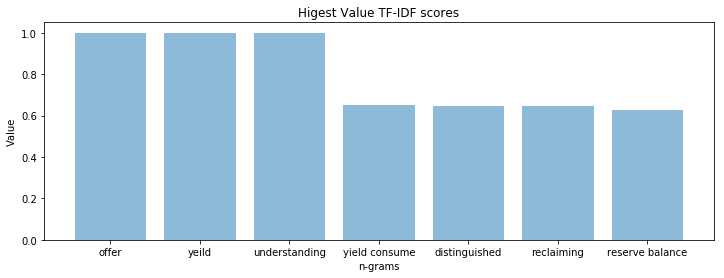

In [23]:
fig, ax = plt.subplots(figsize=(12, 4))
ax.set_xlabel('n-grams')
ax.set_ylabel('Value')
ax.set_title('Higest Value TF-IDF scores')
ax.bar(['offer', 'yeild', 'understanding', 'yield consume', 'distinguished', 'reclaiming', 'reserve balance'], [1,1,1,0.649529,0.647613, 0.646480, 0.628144], align='center', alpha=0.5)

In [24]:
s = pd.Series(tfdf.iloc[2])
s.nlargest(10)

45 day            0.367328
45                0.330236
problem           0.301132
day               0.232570
country           0.221178
executive         0.216004
representative    0.178575
point             0.157448
come              0.155047
check             0.120724
Name: 2, dtype: float64

In [25]:
s = pd.Series(tfdf.iloc[3])
s.nlargest(10)

president     0.283814
vulnerable    0.272501
nation        0.270816
true          0.233534
majority      0.196473
debate        0.171152
law           0.159984
house         0.141577
final         0.134436
terrorist     0.132732
Name: 3, dtype: float64

## Readablity Stuff

In [26]:
import textstat
#WTF do the numbers mean? 
test_data = "my good colleague, mr. dude, from california raised the exact and critical point. The question is , what happens during those 45 days?"
print(textstat.flesch_reading_ease(test_data))

68.77


In [27]:
test = []
t1 = "my good colleague from california raised the exact and critical point."
print(t1.capitalize())
t2 = "The question is , what happens during those 45 days?"
test.append(textstat.flesch_reading_ease(t1))
test.append(textstat.flesch_reading_ease(t2))
print(np.average(test))

My good colleague from california raised the exact and critical point.
69.785


In [28]:
path = "../data/convote_v1.1/data_stage_one/development_set/"
readability = pd.DataFrame([[1, 2, 'stuff']], columns=['Party', 'Size', 'Speech'])
i = 0
for filename in glob.glob(os.path.join(path, '*.txt')):
    tempFil = open(filename, 'r')
    indicator = (filename[-7:-4])
    statinfo = os.stat(filename)
    s = int(statinfo.st_size)
    party = 0
    #democrat = 0, republican = 1
    if indicator[0] == 'D':
        party = 0
    else:
        party = 1
    readability.loc[i] = ([party, s, tempFil.read()])
    i += 1 

In [29]:
import re
import nltk
text = (readability.iloc[0]["Speech"])
newtext = re.sub(r'\s([?.!"](?:\s|$))', r'\1', text)

sent_text = nltk.sent_tokenize(newtext)
print(textstat.flesch_reading_ease(sent_text[12]))

39.0


75.36941612014661 14.423947937986975
75.28388055615589 13.573521864503252
6.020825359741582 3.345638974016681
5.909828398056395 3.1090021079873793


c:\users\taber fisher\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
c:\users\taber fisher\appdata\local\programs\python\python36\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


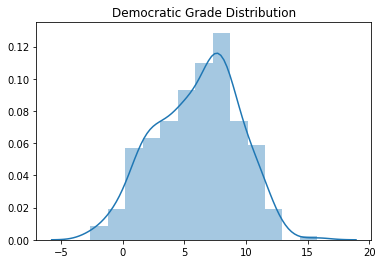

In [30]:
import textatistic
import seaborn as sns
def getReadingScores(df):
    #flesch_reading_ease
    #flesch_kincaid_grade
    dem_reading_ease = []
    repub_reading_ease = []
    dem_grade = []
    repub_grade = []
    for index, row in df.iterrows():
        text = row["Speech"]
        if row["Party"] == 0: 
            #dems
            dem_reading_ease.append(textatistic.flesch_score(text))
            dem_grade.append(textatistic.fleschkincaid_score(text))
        else: 
            #repub
            repub_reading_ease.append(textatistic.flesch_score(text))
            repub_grade.append(textatistic.fleschkincaid_score(text))
    print(np.average(dem_reading_ease), np.std(dem_reading_ease))
    print(np.average(repub_reading_ease), np.std(repub_reading_ease))
    print(np.average(dem_grade), np.std(dem_grade))
    print(np.average(repub_grade), np.std(repub_grade))
    #fig, axs = plt.subplots(ncols=2, figsize=(10, 4))
    #axs[0].bar(['Democrat', 'Republican'], [np.average(dem_reading_ease), np.average(repub_reading_ease)], align='center', alpha=0.5)
    #axs[0].set_title('Average Flesch Reading Ease Score')
    #axs[1].bar(['Democratic', 'Republican'], 
    #               [np.average(dem_grade), np.average(repub_grade)],
    #               align='center', alpha=0.5)
    #axs[1].set_title('Flesch-Kincaid Grade Level Averages')
    sns.distplot(dem_grade).set_title('Democratic Grade Distribution')
    
getReadingScores(readability)

In [31]:
import textatistic
test_data = "The Australian platypus is seemingly a hybrid of a mammal and reptilian creature."
print(textatistic.fleschkincaid_score(test_data))

8.541538461538462
